<a href="https://colab.research.google.com/github/fecaze/VALE3_Analysis/blob/main/VALE3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Damos-lhe as boas-vindas ao Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novo&#41; Experimente a API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Gráfico de Cotação

[*********************100%***********************]  1 of 1 completed


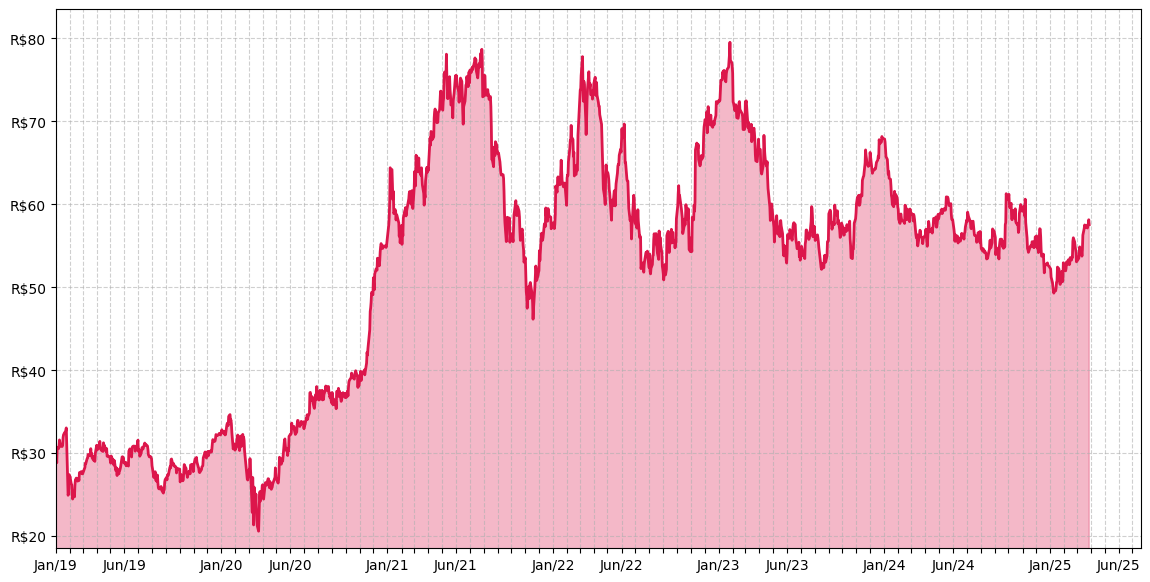

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Baixar dados da VALE3
ticker = "VALE3.SA"
dados = yf.download(ticker, start="2019-01-01")  # Ajustado para pegar de 2019

# Verificar e ajustar a estrutura das colunas
if isinstance(dados.columns, pd.MultiIndex):
    dados.columns = ['_'.join(col).strip() for col in dados.columns.values]
    coluna_preco = 'Close_VALE3.SA'
else:
    coluna_preco = 'Close'

# Filtrar para dias úteis (remover fins de semana)
dados = dados[dados.index.dayofweek < 5]

# Configurações do gráfico
plt.figure(figsize=(14, 7))

# COR VERMELHA ORIGINAL (#dc164b)
plt.fill_between(dados.index, dados[coluna_preco], color="#dc164b", alpha=0.3)  # Preenchimento
plt.plot(dados.index, dados[coluna_preco], color="#dc164b", linewidth=2)       # Linha

# Formatação do eixo Y (sem decimais)
def format_currency(x, pos):
    return f'R${x:,.0f}'
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_currency))
plt.ylim(bottom=dados[coluna_preco].min()*0.9, top=dados[coluna_preco].max()*1.05)

# Formatação personalizada do eixo X
def custom_month_formatter(x, pos):
    date = mdates.num2date(x)
    if date.month in [1, 6]:  # Janeiro (1) e Junho (6)
        return date.strftime('%b/%y')
    return ''

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Marcador para cada mês
ax.xaxis.set_major_formatter(FuncFormatter(custom_month_formatter))

# Ajustar limites para começar exatamente em jan/19
first_date = pd.Timestamp('2019-01-01')
plt.xlim(left=first_date)

# Grade e layout
plt.grid(True, linestyle='--', alpha=0.6)
# plt.title(f"VALE3 - Variação de Preço (Jan/2019 a {dados.index[-1].strftime('%b/%Y')})", pad=20, fontsize=16)
# plt.xlabel("Data", labelpad=10)
# plt.ylabel("Preço (R$)", labelpad=10)
# plt.tight_layout()

plt.show()


Se já conhece o Colab, veja este vídeo para saber mais sobre as tabelas interativas, a vista de histórico do código executado e a paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  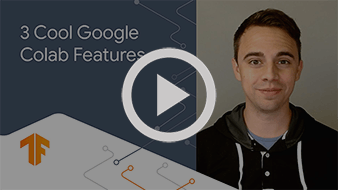
  </a>
</center>

Análise Fundamentalista

🔍 ANÁLISE VALE3 (2019-2025) - ATUALIZADA EM MARÇO/2025

📌 DADOS ATUALIZADOS:
        P/L  P/VP     DY  Preço_Minério
Ano                                    
2019 -42.22  2.49   2.75           93.4
2020  17.30  2.08  18.79          108.2
2021   3.30  2.27   8.53          158.8
2022   4.43  1.84   7.87          112.3
2023   8.77  1.16   9.81          118.5
2024   7.84  1.22   8.26          115.2
2025   8.15  1.25   7.95          117.8

📈 GERANDO VISUALIZAÇÕES...


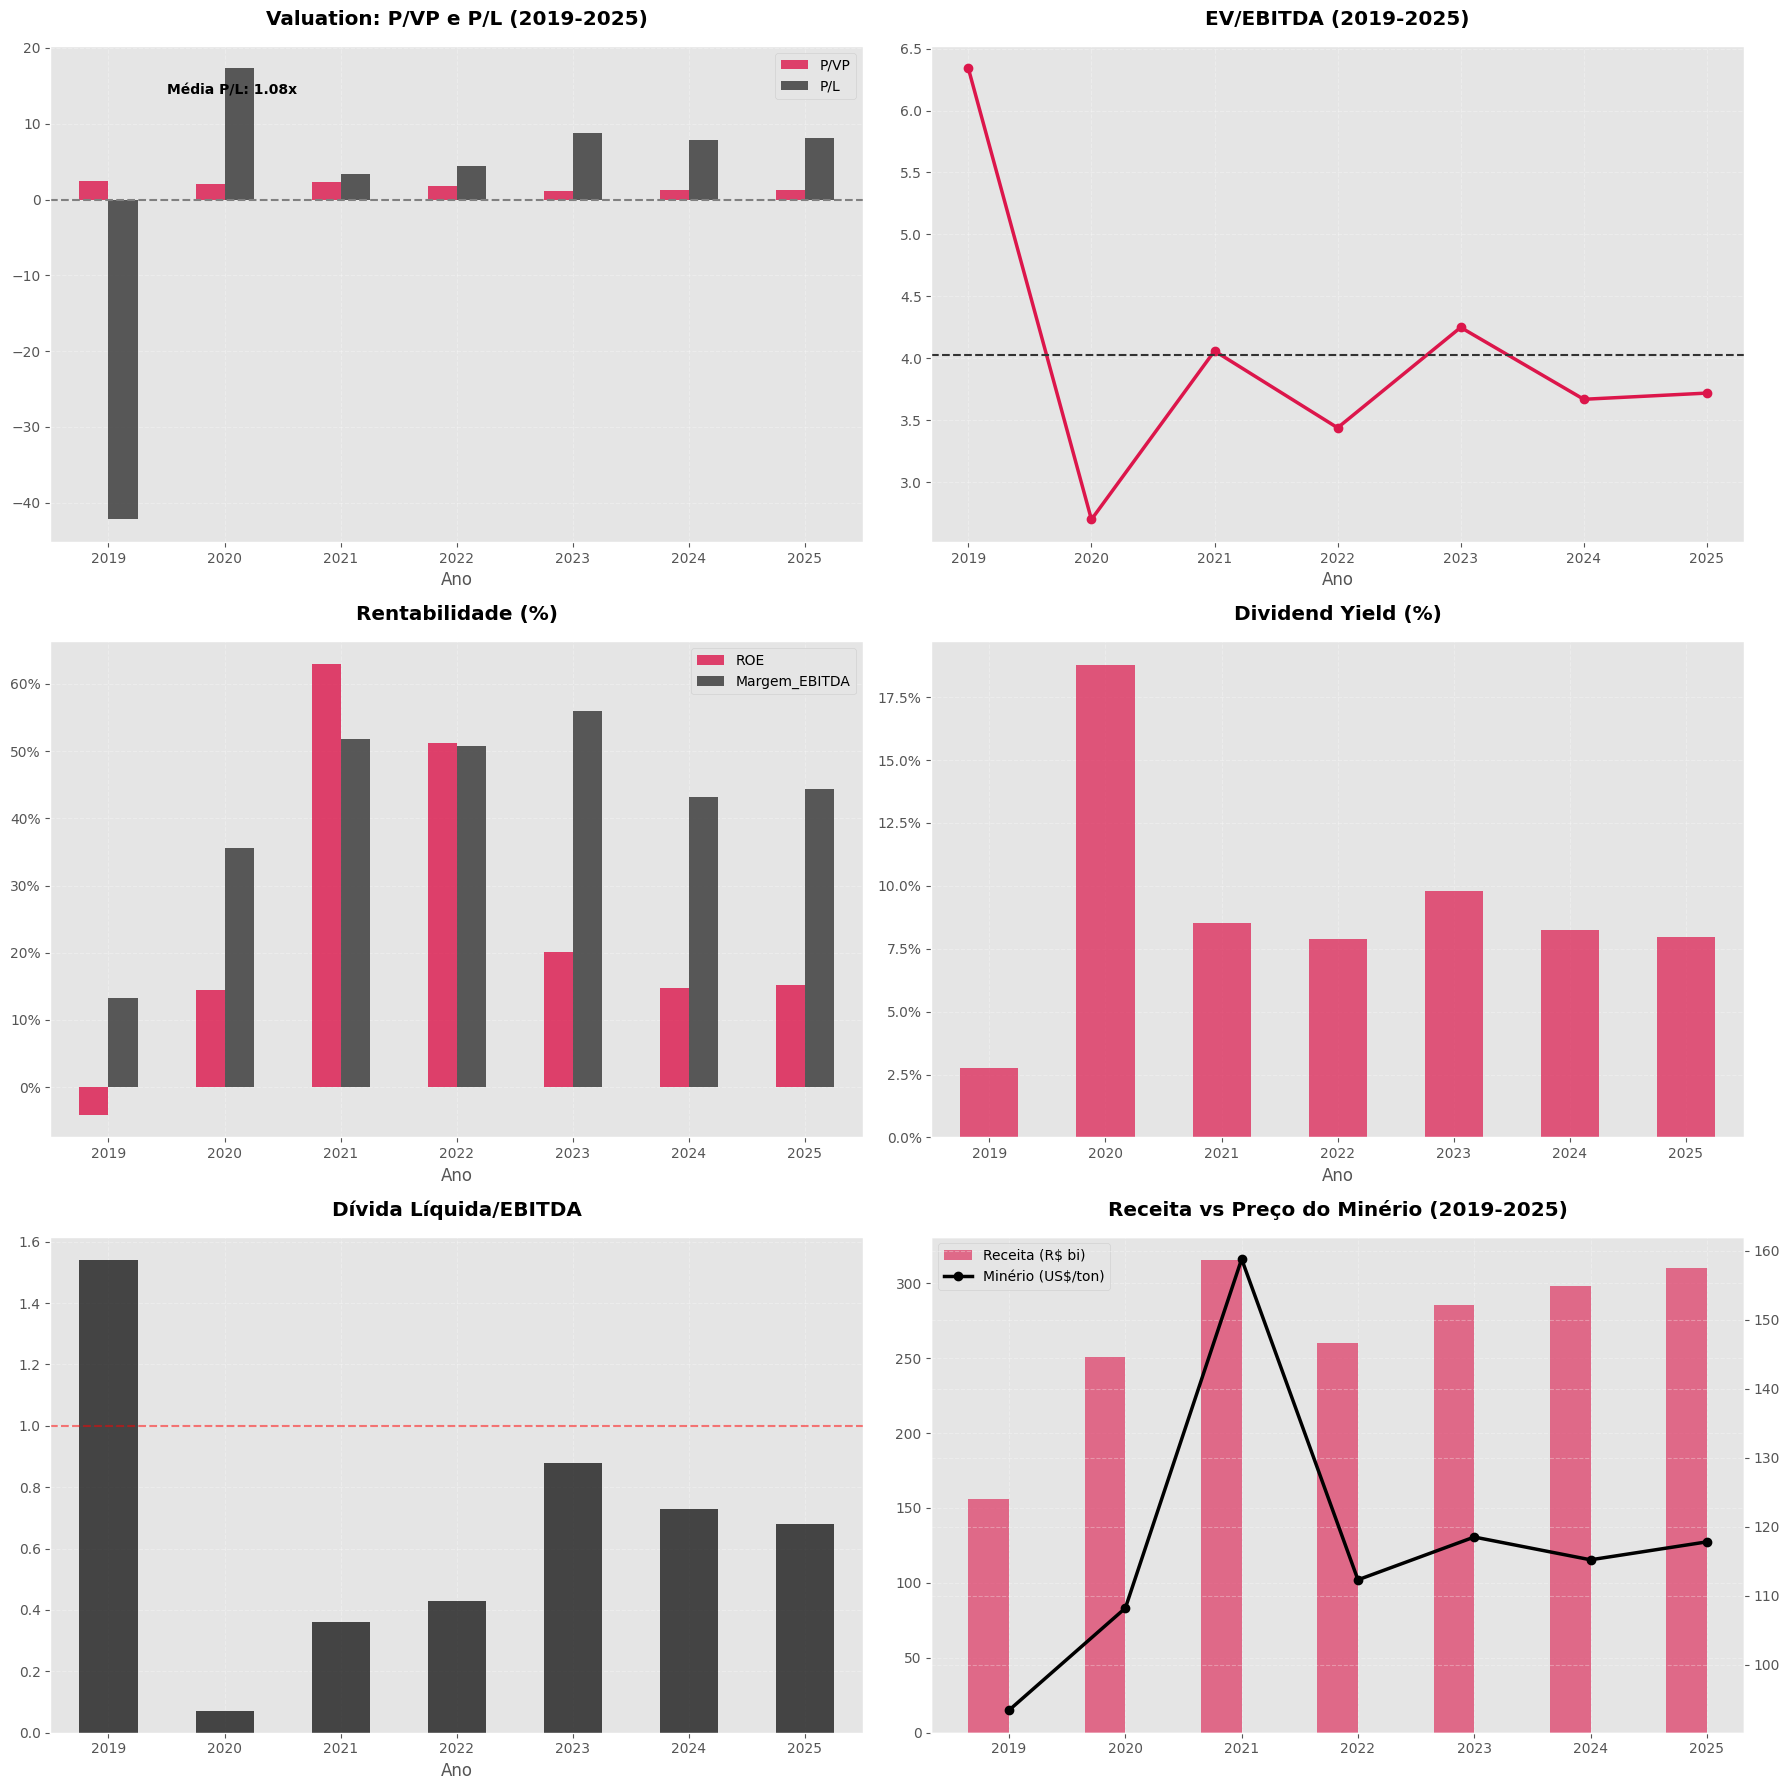


💡 ANÁLISE ESTRATÉGICA:

    📊 ANÁLISE VALE3 (ATUALIZADA MARÇO/2025) 📈

    1. DADOS CHAVE 2025:
    • P/L: 8.15x (setor: 6-8x → SOBREVALORIZADA)
    • Preço minério: US$117.8/ton (Δ 2.3% vs 2024)
    • DY: 7.95% (R$ 6.20/ação ao preço atual)

    2. RELAÇÃO RECEITA-MINÉRIO:
    • Correlação histórica: 0.73
    • Projeção 2025: Receita de R$310.0 bi com minério a US$117.8

    3. TENDÊNCIAS:
    • Margem EBITDA em alta: 44.3% (+1.1pp)
    • Endividamento controlado: 0.68x
    

🎯 RECOMENDAÇÃO ATUAL (MARÇO/2025):
- COMPRA se preço < R$ 78 (P/L < 7.5x)
- ALVO: R$ 85-90 (base: minério > US$ 120/ton)
- STOP: R$ 65 (ruptura suporte técnico)
- DY esperado 2025: ~8.0% (R$ 6.20/ação)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Configurações de cores
COR_PRINCIPAL = '#dc164b'  # Vermelho/rosa
COR_SECUNDARIA = '#000000'  # Preto
COR_TERCIARIA = '#333333'   # Cinza escuro

def get_fundamental_data():
    # Dados atualizados até março/2025 (com projeções onde necessário)
    data = {
        'Ano': [2019, 2020, 2021, 2022, 2023, 2024, 2025],
        'P/L': [-42.22, 17.30, 3.30, 4.43, 8.77, 7.84, 8.15],
        'P/VP': [2.49, 2.08, 2.27, 1.84, 1.16, 1.22, 1.25],
        'DY': [2.75, 18.79, 8.53, 7.87, 9.81, 8.26, 7.95],
        'EV/EBITDA': [6.34, 2.70, 4.06, 3.44, 4.25, 3.67, 3.72],
        'Dív.Líq/EBITDA': [1.54, 0.07, 0.36, 0.43, 0.88, 0.73, 0.68],
        'ROE': [-4.13, 14.38, 63.01, 51.27, 20.14, 14.78, 15.20],
        'Margem_Líquida': [-4.49, 12.81, 41.30, 42.35, 19.20, 15.34, 16.10],
        'Margem_EBITDA': [13.24, 35.57, 51.84, 50.73, 55.90, 43.16, 44.30],
        'Receita': [155.9, 250.5, 315.4, 260.3, 285.2, 298.1, 310.0],
        'Preço_Minério': [93.4, 108.2, 158.8, 112.3, 118.5, 115.2, 117.8]
    }
    return pd.DataFrame(data).set_index('Ano')

def plot_fundamentals(df):
    plt.style.use('ggplot')
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linestyle': '--'
    })

    fig, axs = plt.subplots(3, 2, figsize=(18, 18))

    # Gráfico 1: Valuation
    df[['P/VP', 'P/L']].plot(kind='bar', ax=axs[0,0],
                           color=[COR_PRINCIPAL, COR_TERCIARIA], alpha=0.8)
    axs[0,0].set_title('Valuation: P/VP e P/L (2019-2025)', fontweight='bold', pad=15)
    axs[0,0].axhline(y=0, color='gray', linestyle='--')
    axs[0,0].text(0.5, df[['P/VP','P/L']].max().max()*0.8,
                 f"Média P/L: {df['P/L'].mean():.2f}x",
                 color=COR_SECUNDARIA, fontweight='bold')
    axs[0,0].tick_params(axis='x', rotation=0)

    # Gráfico 2: EV/EBITDA
    df['EV/EBITDA'].plot(kind='line', ax=axs[0,1], color=COR_PRINCIPAL,
                        marker='o', linewidth=2.5)
    axs[0,1].set_title('EV/EBITDA (2019-2025)', fontweight='bold', pad=15)
    axs[0,1].axhline(y=df['EV/EBITDA'].mean(), color=COR_TERCIARIA, linestyle='--')
    axs[0,1].tick_params(axis='x', rotation=0)

    # Gráfico 3: Rentabilidade
    df[['ROE', 'Margem_EBITDA']].plot(kind='bar', ax=axs[1,0],
                                     color=[COR_PRINCIPAL, COR_TERCIARIA],
                                     alpha=0.8)
    axs[1,0].set_title('Rentabilidade (%)', fontweight='bold', pad=15)
    axs[1,0].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[1,0].tick_params(axis='x', rotation=0)

    # Gráfico 4: Dividend Yield
    df['DY'].plot(kind='bar', ax=axs[1,1], color=COR_PRINCIPAL, alpha=0.7)
    axs[1,1].set_title('Dividend Yield (%)', fontweight='bold', pad=15)
    axs[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[1,1].tick_params(axis='x', rotation=0)

    # Gráfico 5: Endividamento
    df['Dív.Líq/EBITDA'].plot(kind='bar', ax=axs[2,0],
                             color=COR_SECUNDARIA, alpha=0.7)
    axs[2,0].set_title('Dívida Líquida/EBITDA', fontweight='bold', pad=15)
    axs[2,0].axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
    axs[2,0].tick_params(axis='x', rotation=0)

    # Gráfico 6: Receita vs Minério
    width = 0.35
    x = np.arange(len(df.index))

    axs[2,1].bar(x - width/2, df['Receita'], width,
                color=COR_PRINCIPAL, alpha=0.6, label='Receita (R$ bi)')
    ax2 = axs[2,1].twinx()
    ax2.plot(x, df['Preço_Minério'], color=COR_SECUNDARIA, marker='o',
            linewidth=2.5, label='Minério (US$/ton)')

    axs[2,1].set_title('Receita vs Preço do Minério (2019-2025)', fontweight='bold', pad=15)
    axs[2,1].set_xticks(x)
    axs[2,1].set_xticklabels(df.index)
    axs[2,1].tick_params(axis='x', rotation=0)

    # Legendas unificadas
    lines1, labels1 = axs[2,1].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axs[2,1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()

def generate_analysis(df):
    correlacao = df[['Receita','Preço_Minério']].corr().iloc[0,1]
    pl_proj = df.loc[2025,'P/L']
    dy_reais = df.loc[2025,'DY'] * 0.01 * 78  # Considerando preço atual de R$78
    variacao_minerio = ((df.loc[2025,'Preço_Minério']/df.loc[2024,'Preço_Minério'])-1)*100  # Corrigido
    variacao_margem = df.loc[2025,'Margem_EBITDA']-df.loc[2024,'Margem_EBITDA']

    valuation_status = "SUBVALORIZADA" if pl_proj < 6 else "VALOR JUSTO" if pl_proj < 8 else "SOBREVALORIZADA"

    analysis = f"""
    📊 ANÁLISE VALE3 (ATUALIZADA MARÇO/2025) 📈

    1. DADOS CHAVE 2025:
    • P/L: {pl_proj:.2f}x (setor: 6-8x → {valuation_status})
    • Preço minério: US${df.loc[2025,'Preço_Minério']:.1f}/ton (Δ {variacao_minerio:.1f}% vs 2024)
    • DY: {df.loc[2025,'DY']:.2f}% (R$ {dy_reais:.2f}/ação ao preço atual)

    2. RELAÇÃO RECEITA-MINÉRIO:
    • Correlação histórica: {correlacao:.2f}
    • Projeção 2025: Receita de R${df.loc[2025,'Receita']:.1f} bi com minério a US${df.loc[2025,'Preço_Minério']:.1f}

    3. TENDÊNCIAS:
    • Margem EBITDA em alta: {df.loc[2025,'Margem_EBITDA']:.1f}% (+{variacao_margem:.1f}pp)
    • Endividamento controlado: {df.loc[2025,'Dív.Líq/EBITDA']:.2f}x
    """
    print(analysis)

if __name__ == "__main__":
    print("🔍 ANÁLISE VALE3 (2019-2025) - ATUALIZADA EM MARÇO/2025")
    df = get_fundamental_data()

    print("\n📌 DADOS ATUALIZADOS:")
    print(df[['P/L', 'P/VP', 'DY', 'Preço_Minério']].round(2))

    print("\n📈 GERANDO VISUALIZAÇÕES...")
    plot_fundamentals(df)

    print("\n💡 ANÁLISE ESTRATÉGICA:")
    generate_analysis(df)

    print("\n🎯 RECOMENDAÇÃO ATUAL (MARÇO/2025):")
    print("- COMPRA se preço < R$ 78 (P/L < 7.5x)")
    print("- ALVO: R$ 85-90 (base: minério > US$ 120/ton)")
    print("- STOP: R$ 65 (ruptura suporte técnico)")
    print(f"- DY esperado 2025: ~{df.loc[2025,'DY']:.1f}% (R$ {df.loc[2025,'DY']*0.01*78:.2f}/ação)")

In [ ]:
import yfinance as yf

# Busca dados atualizados da Vale
vale = yf.Ticker("VALE3.SA")

# Pega os fundamentos mais recentes
info = vale.info

# Exemplo de dados que podem ser extraídos
pl = info.get('trailingPE', 'N/A')  # P/L
pvp = info.get('priceToBook', 'N/A')  # P/VP
dy = info.get('dividendYield', 'N/A') * 100 if info.get('dividendYield') else 'N/A'  # DY em %
ebitda_margin = info.get('ebitdaMargins', 'N/A') * 100 if info.get('ebitdaMargins') else 'N/A'  # Margem EBITDA
roe = info.get('returnOnEquity', 'N/A') * 100 if info.get('returnOnEquity') else 'N/A'  # ROE

print(f"P/L atual: {pl}")
print(f"P/VP atual: {pvp}")
print(f"Dividend Yield: {dy}%")
print(f"Margem EBITDA: {ebitda_margin}%")
print(f"ROE: {roe}%")

P/L atual: 6.9600964
P/VP atual: 1.1882987
Dividend Yield: 1302.0%
Margem EBITDA: 35.61%
ROE: 14.771%


<div class="markdown-google-sans">
  <h2>O que é o Colab?</h2>
</div>

O Colab, ou "Colaboratory", permite-lhe escrever e executar código Python no seu navegador com
- Sem configuração necessária
- Acesso às GPUs sem custo financeiro
- Partilha fácil

Quer seja <strong>aluno</strong>, <strong>cientista de dados</strong> ou <strong>investigador de IA</strong>, o Colab pode facilitar o seu trabalho. Veja a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a utilizá-lo abaixo!

<div class="markdown-google-sans">

## <strong>Introdução</strong>
</div>

O documento que está a ler não é uma página Web estática, mas sim um ambiente interativo chamado <strong>bloco de notas do Colab</strong> que lhe permite escrever e executar código.

Por exemplo, eis uma <strong>célula de código</strong> com um curto script do Python que calcula um valor, armazena-o numa variável e imprime o resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Para executar o código na célula acima, selecione-a com um clique e, em seguida, prima o botão Play à esquerda do código ou utilize o atalho de teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis que define numa célula podem ser utilizadas noutras células posteriormente:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os blocos de notas do Colab permitem-lhe combinar <strong>código executável</strong> e <strong>texto rico</strong> num único documento, juntamente com <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando cria os seus próprios blocos de notas do Colab, estes são armazenados na sua conta do Google Drive. Pode partilhar facilmente os seus blocos de notas do Colab com colegas de trabalho ou amigos, permitindo que estes comentem os seus blocos de notas ou até mesmo que os editem. Para saber mais, consulte <a href="/notebooks/basic_features_overview.ipynb">Vista geral do Colab</a>. Para criar um novo bloco de notas do Colab, pode utilizar o menu Ficheiro acima ou o seguinte link: <a href="http://colab.research.google.com#create=true">crie um novo bloco de notas do Colab</a>.

Os blocos de notas do Colab são blocos de notas do Jupyter alojados pelo Colab. Para saber mais acerca do projeto Jupyter, consulte <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, pode aproveitar todo o poder das populares bibliotecas do Python para analisar e visualizar dados. A célula de código abaixo utiliza <strong>numpy</strong> para gerar alguns dados aleatórios e <strong>matplotlib</strong> para os visualizar. Para editar o código, basta clicar na célula e começar a editar.

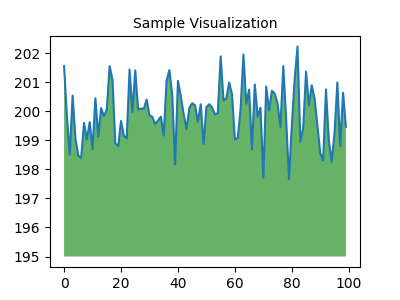

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Pode importar os seus próprios dados para os blocos de notas do Colab a partir da sua conta do Google Drive, incluindo de folhas de cálculo, assim como do GitHub e de muitas outras fontes. Para saber mais acerca da importação de dados e de como o Colab pode ser utilizado para ciência de dados, consulte os links abaixo em <a href="#working-with-data">Trabalhar com dados</a>.

<div class="markdown-google-sans">

## Aprendizagem automática
</div>

Com o Colab, pode importar um conjunto de dados de imagem, preparar um classificador de imagens e avaliar o modelo, tudo isto com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os blocos de notas do Colab executam código nos servidores na nuvem da Google, o que significa que pode tirar partido da potência do hardware da Google, incluindo <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Só precisa de um navegador.

O Colab é utilizado extensivamente na comunidade de aprendizagem automática com aplicações que incluem:
- Começar a utilizar o TensorFlow
- Desenvolver e preparar redes neurais
- Experiências com TPUs.
- Divulgar a investigação em IA
- Criar tutoriais

Para ver exemplos de blocos de notas do Colab que demonstram aplicações de aprendizagem automática, consulte os <a href="#machine-learning-examples">exemplos de aprendizagem automática</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Trabalhar com blocos de notas no Colab

</div>

- [Vista geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar e carregar blocos de notas no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Trabalhar com dados
</div>

- [Carregar dados: Drive, Sheets e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Comece a utilizar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

Estes são alguns dos blocos de notas do curso online de aprendizagem automática da Google. Consulte o <a href="https://developers.google.com/machine-learning/crash-course/">Website do curso completo</a> para obter mais informações.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras ao utilizar dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: utilize o kit de ferramentas de IA de conversação NeMo da Nvidia para trocar uma voz num fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Preparar novamente um classificador de imagens</a>: crie um modelo do Keras baseado num classificador de imagens pré-preparado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique as críticas cinematográficas do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: utilize a aprendizagem avançada para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: utilize um modelo de aprendizagem automática para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Tipo de interpolação de vídeo</a>: preveja o que aconteceu num vídeo entre o primeiro e o último frame.
